<h1 style='text-align: center;'> PRUEBA 3: MÉTODO DE LA TRANSFORMADA INVERSA </h1>

Escoger algún tipo de función de trasformación inversa y ponerlo en práctica utilizando Python.
- **Función:** Exponencial (*Seleccionada en base al orden de lista*).
- **Números de ejemplos:** 100

In [1]:
# Fix height output cell!
from IPython.display import HTML
display(HTML("<style>div.output_scroll { height: 255em; }</style>"))

### Problema

El tiempo empleador por el Taller Mecánico Automotriz Autolab para el trabajo de alineación y balanceo tiene una distribución exponencial, con media de 0.8 horas/cliente. Simule el comportamiento de la variable aleatoria para una lista de 100 números pseudo aleatorios. Teniendo en cuenta que $u \sim U(0,1)$ y la ecuación generadora exponencial es $x_{i}=-\frac{1}{\lambda }\ln (1-U)$.

<img src="./formulas.png">

#### Funciones

In [2]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
 
def exponential_pdf(u, lmbda):
    '''Probability density function.'''
    # Formula: 𝜆𝑒^(−𝜆𝑥)
    # lam: Lambda del problema
    # u: Número aleatorio muestreado desde una distribución uniforme
    return lmbda * np.exp(-lmbda * u)

def exponential_cdf(u, lmbda):
    '''Cumulative distribution function.'''
    # Formula: 1−𝑒^(−𝜆𝑥)
    # lam: Lambda del problema
    # u: Número aleatorio muestreado desde una distribución uniforme
    return 1 - np.exp(-lmbda * u)

def exponential_icdf(u, lmbda):
    '''Inverse exponential function.'''
    # Formula: -1/𝜆 * ln(1-U)
    # lam: Lambda del problema
    # u: Número aleatorio muestreado desde una distribución uniforme
    return -np.log(1-u)/lmbda 


def show_table(random_numbers, exp_result):
    # random_numbers: Lista de números pseudo aleatorios de una distribución uniforme
    # exp_result: Lista de tiempos de servicos tras aplicar la función calcular_tiempo_servicio
    indexs = range(1, len(exp_result) + 1)
    table = zip(indexs, random_numbers, exp_result)
    headers = ["Cliente", "ri", "Tiempo de servicio (Horas)"]
    display(Markdown(f'**Tabla resultante**'))
    print(tabulate(table, headers=headers, tablefmt="fancy_grid", numalign='center'))

### Simulación

In [3]:
# Lista de 100 números pseudoaleatorios uniformes
N = 100
random_numbers = np.random.uniform(0,1,size=N)
lmbda = 0.8 # Tiempo medio de atención

# Display
display(Markdown(f'**Muestra de números pseudoaleatorios generados**'))
display(Markdown(f'{random_numbers[:10]}'))

# Resultado de los tiempos de servicios
exp_results = exponential_icdf(random_numbers, lmbda)
show_table(random_numbers, exp_results)

**Muestra de números pseudoaleatorios generados**

[0.31649186 0.50812559 0.23483255 0.58064168 0.25051271 0.8849702
 0.16538019 0.58268714 0.33210416 0.29940427]

**Tabla resultante**

╒═══════════╤════════════╤══════════════════════════════╕
│  Cliente  │     ri     │  Tiempo de servicio (Horas)  │
╞═══════════╪════════════╪══════════════════════════════╡
│     1     │  0.316492  │           0.475646           │
├───────────┼────────────┼──────────────────────────────┤
│     2     │  0.508126  │           0.886915           │
├───────────┼────────────┼──────────────────────────────┤
│     3     │  0.234833  │           0.334576           │
├───────────┼────────────┼──────────────────────────────┤
│     4     │  0.580642  │           1.08629            │
├───────────┼────────────┼──────────────────────────────┤
│     5     │  0.250513  │           0.360457           │
├───────────┼────────────┼──────────────────────────────┤
│     6     │  0.88497   │           2.70321            │
├───────────┼────────────┼──────────────────────────────┤
│     7     │  0.16538   │           0.225974           │
├───────────┼────────────┼──────────────────────────────┤
│     8     │ 

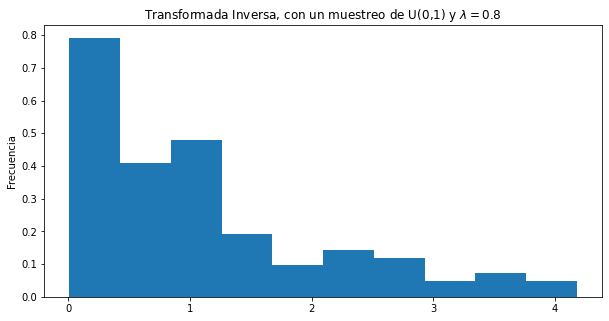

In [4]:
#Figura
plt.figure(figsize=(10,5))
plt.hist(exp_results, density=True)
plt.title(f'Transformada Inversa, con un muestreo de U(0,1) y $\lambda= {lmbda}$')
plt.ylabel('Frecuencia')
plt.show()

### Graficas/Resultados

**Función de densidad:** $\lambda e^{-\lambda x}$, si $x \geq 0 $.

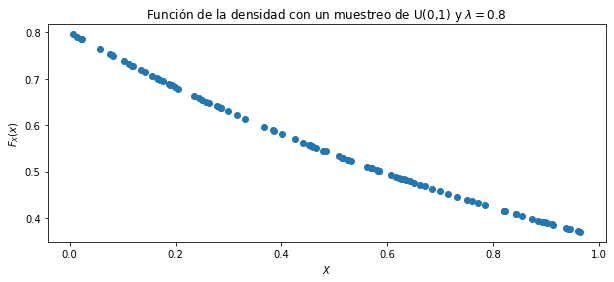

In [5]:
# Función
exp_density_results = exponential_pdf(random_numbers, lmbda)

# Figura
plt.figure(figsize=(10,4))
plt.plot(random_numbers, exp_density_results, 'o', lw=2, label='frozen pdf')
plt.title(f'Función de la densidad con un muestreo de U(0,1) y $\lambda= {lmbda}$')
plt.ylabel('$F_X(x)$')
plt.xlabel('$X$')
plt.show()

**Función de probabilid adacumulada:** $1-e^{-\lambda x}$

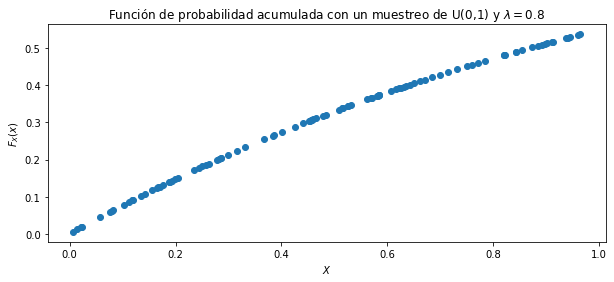

In [6]:
# Función
exp_cumulative_results = exponential_cdf(random_numbers, 0.8)

# Figura
plt.figure(figsize=(10,4))
plt.plot(random_numbers, exp_cumulative_results, 'o', lw=2)
plt.title(f'Función de probabilidad acumulada con un muestreo de U(0,1) y $\lambda= {lmbda}$')
plt.ylabel('$F_X(x)$')
plt.xlabel('$X$')
plt.show()

### Referencias
1. https://en.wikipedia.org/wiki/Exponential_distribution